### Import Library 

Import library python yang sesuai dengan study case kali ini

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_distances
from nltk.tokenize import word_tokenize

nltk.download('punkt')  

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pikri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Data Loading 

Melihat 5 teratas dataset

In [2]:
# Melihat 5 teratas dasaset
df_anime = pd.read_csv('anime.csv')
df_anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


### Data Preparation 

Melihat info, ukuran, dan ringkasan singkat mengenai dataset

In [3]:
# Melihat info dari dataset
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
anime_id    12294 non-null int64
name        12294 non-null object
genre       12232 non-null object
type        12269 non-null object
episodes    12294 non-null object
rating      12064 non-null float64
members     12294 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [4]:
# Ukuran dataset
df_anime.shape

(12294, 7)

In [5]:
# Ringkasan dataset 
df_anime.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


Melihat missing value dan data duplikat yang ada di dataset dan menghapusnya jka ada

In [6]:
# Melihat jumlah missing value pada dataframe 
print(f"Jumlah missing value pada dataframe anime: \n{df_anime.isna().sum()}")

Jumlah missing value pada dataframe anime: 
anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


In [7]:
# Menghapus missing value pada dataframe 
df_anime.dropna(inplace=True)
print(f"Jumlah missing value pada dataframe anime: \n{df_anime.isna().sum()}")

Jumlah missing value pada dataframe anime: 
anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64


In [8]:
# Melihat jumlah data yang terduplikat pada dataframe 
print(f"Jumlah data duplikat pada dataframe anime: \n{df_anime.duplicated().sum()}")

Jumlah data duplikat pada dataframe anime: 
0


Melihat keragaman data kategorik dari kolom `genre`, `type`, dan `episodes`

In [9]:
# Melihat data pada kolom `genre`
df_anime['genre'].unique()

array(['Drama, Romance, School, Supernatural',
       'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen',
       'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen',
       ..., 'Action, Comedy, Hentai, Romance, Supernatural',
       'Hentai, Sports', 'Hentai, Slice of Life'], dtype=object)

In [10]:
# Melihat data pada kolom `type`
df_anime['type'].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'], dtype=object)

In [11]:
# Melihat data pada kolom `episodes`
df_anime['episodes'].unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '65', '243',
       '193', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

### Data Preprocessing 

Melihat berapa banyak data 'Unknown' dari kolom episodes

In [12]:
# Melihat jumlah data yang mengandung value 'Unknown' pada kolom episodes
df_anime[df_anime['episodes'] == 'Unknown']

,anime_id,name,genre,type,episodes,rating,members
74,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,Unknown,8.58,504862
252,235,Detective Conan,"Adventure, Comedy, Mystery, Police, Shounen",TV,Unknown,8.25,114702
615,1735,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,Unknown,7.94,533578
991,966,Crayon Shin-chan,"Comedy, Ecchi, Kids, School, Shounen, Slice of...",TV,Unknown,7.73,26267
1021,33157,Tanaka-kun wa Itsumo Kedaruge Specials,"Comedy, School, Slice of Life",Special,Unknown,7.72,5400
...,...,...,...,...,...,...,...
11648,32238,"Watashi wa, Kairaku Izonshou",Hentai,OVA,Unknown,6.32,1569
11752,28169,Buta no Gotoki Sanzoku ni Torawarete Shojo wo ...,Hentai,OVA,Unknown,6.14,1992
12024,30770,Maid-san to Boin Damashii,"Harem, Hentai",OVA,Unknown,5.71,1498
12045,33125,Shiiku x Kanojo: Tenshi no Kousoku-hen,Hentai,OVA,Unknown,5.68,1326


Ternyata cukup banya data 'Unknown' daripada kita hapus lebih baik kita ganti valuenya dengan 'Ongoing' agar mudah dipahami.

In [13]:
# Mengganti  data yang mengandung value 'Unknown' menjadi 'Ongoing'
df_anime.loc[df_anime['episodes'] == 'Unknown', 'episodes'] = 'Ongoing'
df_anime[df_anime['episodes'] == 'Ongoing']

,anime_id,name,genre,type,episodes,rating,members
74,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,Ongoing,8.58,504862
252,235,Detective Conan,"Adventure, Comedy, Mystery, Police, Shounen",TV,Ongoing,8.25,114702
615,1735,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,Ongoing,7.94,533578
991,966,Crayon Shin-chan,"Comedy, Ecchi, Kids, School, Shounen, Slice of...",TV,Ongoing,7.73,26267
1021,33157,Tanaka-kun wa Itsumo Kedaruge Specials,"Comedy, School, Slice of Life",Special,Ongoing,7.72,5400
...,...,...,...,...,...,...,...
11648,32238,"Watashi wa, Kairaku Izonshou",Hentai,OVA,Ongoing,6.32,1569
11752,28169,Buta no Gotoki Sanzoku ni Torawarete Shojo wo ...,Hentai,OVA,Ongoing,6.14,1992
12024,30770,Maid-san to Boin Damashii,"Harem, Hentai",OVA,Ongoing,5.71,1498
12045,33125,Shiiku x Kanojo: Tenshi no Kousoku-hen,Hentai,OVA,Ongoing,5.68,1326


Fungsi `text_cleaning` ini untuk membersihkan simbol yang ada di kolom `name` dengan menggunakan RegEx (Regular Expression)

In [14]:
# Membuat fungsi `text_cleaning` untuk membersihkan simbol yang ada di kolom `name`
def text_cleaning(text):
    # 1. Menghapus semua tanda kutip ganda dari teks
    text = re.sub(r'"', '', text)
    
    # 2. Menghapus substring '.hack//' dari teks
    text = re.sub(r'.hack//', '', text)
    
    # 3. Menghapus semua tanda kutip tunggal dari teks
    text = re.sub(r"'", '', text)
    
    # 4. Menghapus substring "A's" dari teks
    text = re.sub(r"A's", '', text)
    
    # 5. Mengubah "I'" menjadi "I\'" (dengan tanda kutip backslash sebagai pelarian)
    text = re.sub(r"I'", "I\'", text)
    
    # 6. Mengganti tanda ampersand '&' dengan kata 'and'
    text = re.sub(r'&', 'and', text)
    
    # 7. Mengembalikan teks yang sudah dibersihkan
    return text

# Menggunakan fungsi `text_cleaning` pada kolom `name`
df_anime['name'] = df_anime['name'].apply(text_cleaning)

##### Univariate Data Analysis 

Melihat persebaran distribusi dari kolom `type` dan `rating` dari anime

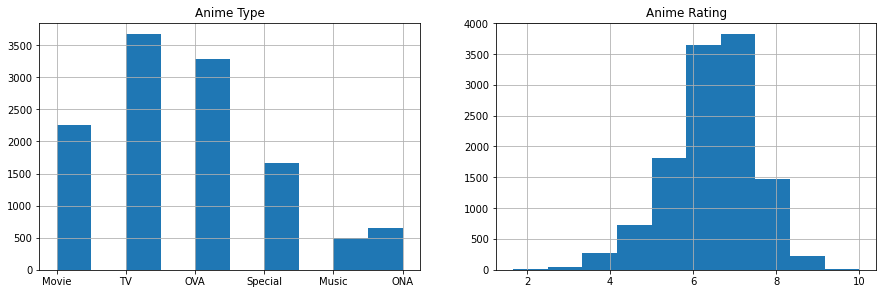

In [15]:
# Visualisasi histogram pada kolom `type`
plt.subplot(2,2,1)
plt.title('Anime Type')
df_anime.type.hist(figsize=(15,10));

# Visualisasi histogram pada kolom `rating`
plt.subplot(2,2,2)
plt.title('Anime Rating')
df_anime.rating.hist(figsize=(15,10));

Setelah kita melakukan visualisasi, kita tahu bahwa kebanyakan anime bertipe TV dan OVA dengan kebanyakan anime mendapatkan rating sekitar 6 - 7

### Modeling  
Tahap ini kita membuat fungsi untuk mendapatkan untuk rekomendasi berdasarkan anime serupa.

#### Content Based Filtering 

Inisialisasi CountVectorizer pada variabel `bow` (Bag of Words) dan variabel `bank` berisi representasi bag-of-words dari teks dalam kolom genre

In [16]:
# Inisialisasi CountVectorizer
bow = CountVectorizer(stop_words="english",tokenizer=word_tokenize)

# Menerapkan CountVectorizer pada kolom 'genre' dari df_anime
bank = bow.fit_transform(df_anime['genre'])

Variabel `idx` akan digunakan sebagai indeks baris dan variabel `content` mengakses nilai pada baris dengan indeks idx

In [28]:
# Indeks baris untuk memilih data dari DataFrame df_anime
idx = 0

#  Mengakses nilai pada baris dengan indeks idx dan kolom genre
content = df_anime.loc[idx,'genre']
content

'Drama, Romance, School, Supernatural'

Variabel `code` menyimpan hasil dari transformasi teks content menjadi representasi bag-of-words (BoW).

In [29]:
# `code` menyimpan hasil dari content menjadi representasi bag-of-words (BoW).
code = bow.transform([content])
code

<1x46 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

Menghitung jarak kosinus antara dua matriks sparse `code` dan `bank` lalu menampilkannya

In [30]:
# `dist` menghitung jarak kosinus antara dua matriks sparse `code` dan `bank`
dist = cosine_distances(code, bank)
dist

array([[0.        , 0.19638562, 0.23868112, ..., 1.        , 1.        ,
        1.        ]])

Variabel `rec_idx` menyimpan indeks dokumen dengan jarak kosinus terkecil (tidak termasuk dokumen itu sendiri) sebagai rekomendasi dan memilih indeks ke-1 hingga ke-5 dalam urutan tersebut

In [31]:
# rec_idx menyimpan indeks dokumen dengan jarak kosinus terkecil dan memilih indeks ke-1 hingga ke-5
rec_idx = dist.argsort()[0,1:6]
rec_idx

array([5803, 6391, 1111,  986, 1604], dtype=int64)

Mengakses baris-baris pada DataFrame `df_anime` menggunakan indeks yang disimpan dalam `rec_idx`

In [33]:
df_anime.loc[rec_idx,["name", "genre"]]

,name,genre
5803,Vampiyan Kids,"Comedy, Fantasy, Kids"
6391,Rusty Nail,"Action, Music, Sci-Fi"
1111,Aura: Maryuuin Kouga Saigo no Tatakai,"Comedy, Drama, Romance, School, Supernatural"
986,Shakugan no Shana,"Action, Drama, Fantasy, Romance, School, Super..."
1604,Shakugan no Shana S,"Action, Drama, Fantasy, Romance, School, Super..."


### Membuat Fungsi Model

- idx: Indeks anime yang akan digunakan sebagai referensi untuk rekomendasi.
- dataframe: DataFrame yang berisi data anime.
- column: Nama kolom yang berisi genre yang akan digunakan untuk perhitungan kesamaan.

Lalu fungsi tersebut mencetak informasi tentang anime referensi dan genrenya dan mengembalikan DataFrame yang berisi nama dan genre anime yang direkomendasikan berdasarkan kesamaan genre.

In [22]:
def Recommendation(idx,dataframe,column):
    bow = CountVectorizer(stop_words="english",tokenizer=word_tokenize)
    bank = bow.fit_transform(dataframe[column])
    content = dataframe.loc[idx,column]
    code = bow.transform([content])
    dist = cosine_distances(code, bank)
    rec_idx = dist.argsort()[0,1:6]
    print(f"Anime '{dataframe['name'][idx]}' \ndengan genre '{dataframe['genre'][idx]}'\nRekomendasi untuk user: ")
    return df_anime.loc[rec_idx, ["name", "genre"]]

Mari kita coba bisakah fungsi mengambil anime dari indeks yang kita input dan merekomendasikan anime yang serupa

In [23]:
# Meminta rekomendasi anime yang mirip dengan anime yang berada pada indeks 1 dalam DataFrame df_anime.
Recommendation(1,df_anime,'genre')

Anime 'Fullmetal Alchemist: Brotherhood' 
dengan genre 'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen'
Rekomendasi untuk user: 


,name,genre
1558,Fullmetal Alchemist: The Sacred Star of Milos,"Action, Adventure, Comedy, Drama, Fantasy, Mag..."
200,Fullmetal Alchemist,"Action, Adventure, Comedy, Drama, Fantasy, Mag..."
402,Fullmetal Alchemist: Brotherhood Specials,"Adventure, Drama, Fantasy, Magic, Military, Sh..."
9223,Kiku-chan to Ookami,"Adventure, Historical"
4233,Crayon Shin-chan Movie 16: Chou Arashi wo Yobu...,"Comedy, Ecchi, Kids, School, Shounen, Slice of..."


Hasilnya cukup baik. Selanjutnya kita coba indeks yang lain

In [24]:
# Meminta rekomendasi anime yang mirip dengan anime yang berada pada indeks 17 dalam DataFrame df_anime.
Recommendation(17,df_anime,'genre')

Anime 'Mushishi Zoku Shou 2nd Season' 
dengan genre 'Adventure, Fantasy, Historical, Mystery, Seinen, Slice of Life, Supernatural'
Rekomendasi untuk user: 


,name,genre
85,Mushishi Zoku Shou: Odoro no Michi,"Adventure, Fantasy, Historical, Mystery, Seine..."
33,Mushishi Zoku Shou: Suzu no Shizuku,"Adventure, Fantasy, Historical, Mystery, Seine..."
28,Mushishi,"Adventure, Fantasy, Historical, Mystery, Seine..."
27,Mushishi Zoku Shou,"Adventure, Fantasy, Historical, Mystery, Seine..."
17,Mushishi Zoku Shou 2nd Season,"Adventure, Fantasy, Historical, Mystery, Seine..."


Lumayan untuk kali ini. Selanjutnya kita coba yang terakhir

In [25]:
# Meminta rekomendasi anime yang mirip dengan anime yang berada pada indeks 69 dalam DataFrame df_anime.
Recommendation(69,df_anime,'genre')

Anime 'Uchuu Kyoudai' 
dengan genre 'Comedy, Sci-Fi, Seinen, Slice of Life, Space'
Rekomendasi untuk user: 


,name,genre
2561,Uchuu Kyoudai: Number Zero,"Comedy, Sci-Fi, Seinen, Slice of Life, Space"
2180,Denpa Onna to Seishun Otoko,"Comedy, Sci-Fi, Seinen, Slice of Life"
4210,Ore no Imouto ga Konnani Kawaii Wake ga Nai.: ...,"Comedy, Romance"
3503,Muka Muka Paradise,"Adventure, Comedy"
3157,Roots,"Adventure, Drama, Fantasy, Game, Sci-Fi"


Sistem telah berhasil merekomendasikan top 5 anime yang mirip dengan masing-masing genrenya, yaitu beberapa film dan seri dari anime itu sendiri. Jadi, jika pengguna menyukai Fullmetal Alchemist: Brotherhood, maka sistem dapat merekomendasikan seri atau movie lainnya.